In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Define tickers and weights
tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS']
weights = np.array([0.28, 0.25, 0.18, 0.16, 0.13])  # Market cap weights

In [3]:
tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS']
start_date = '2004-01-01'
end_date = '2024-01-01'

# Step 2: Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Step 3: Save to Excel
#data.to_excel("stocks_2004_2024.xlsx")  // to be used when to download data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
# Calculate daily returns
returns = data.pct_change().dropna()

C:\Users\91873\AppData\Local\Temp\ipykernel_2164\1275597699.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()


In [5]:
# Compute portfolio returns
portfolio_returns = returns.dot(weights)

In [6]:
# Calculate Historical VaR at 95% confidence level
VaR_95 = np.percentile(portfolio_returns, 5)

# Calculate Parametric VaR
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()
VaR_parametric = mean_return - 1.65 * std_return  # 95% confidence

# Calculate Conditional VaR (Expected Shortfall)
CVaR_95 = portfolio_returns[portfolio_returns <= VaR_95].mean()

# Output the results
print(f"Historical VaR (95%): {VaR_95:.4f}")
print(f"Parametric VaR (95%): {VaR_parametric:.4f}")
print(f"Conditional VaR (95%): {CVaR_95:.4f}")

Historical VaR (95%): -0.0225
Parametric VaR (95%): -0.0284
Conditional VaR (95%): -0.0367


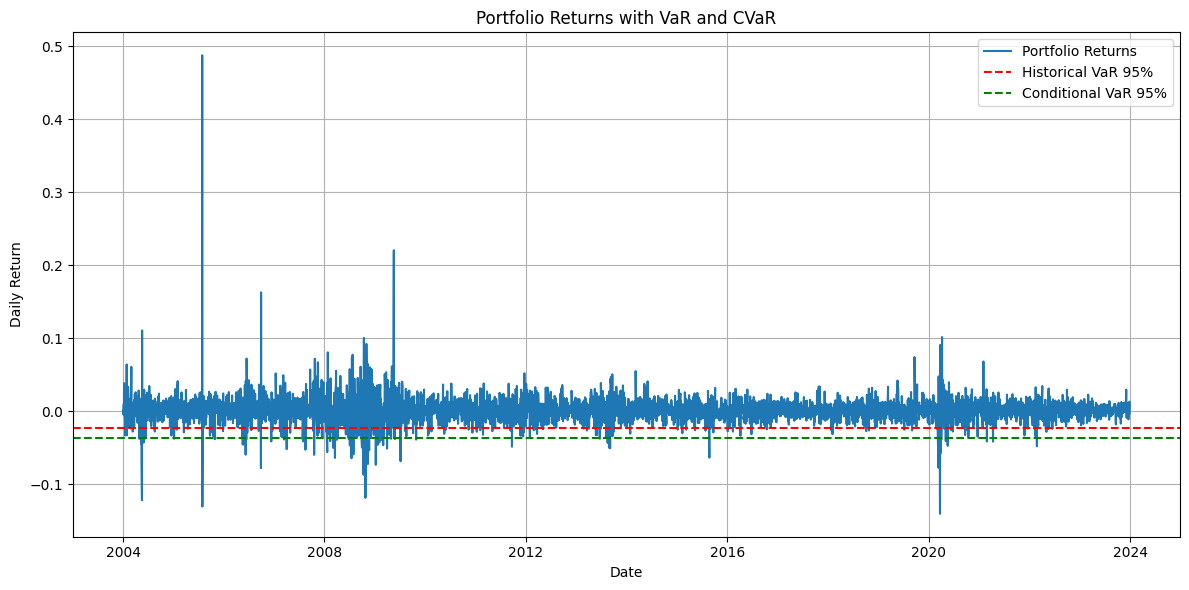

In [7]:
# Plotting the portfolio returns and VaR
plt.figure(figsize=(12,6))
plt.plot(portfolio_returns.index, portfolio_returns, label='Portfolio Returns')
plt.axhline(y=VaR_95, color='r', linestyle='--', label='Historical VaR 95%')
plt.axhline(y=CVaR_95, color='g', linestyle='--', label='Conditional VaR 95%')
plt.title('Portfolio Returns with VaR and CVaR')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total Days Evaluated: 4698
Number of Exceptions: 244
Exception Rate: 5.19%


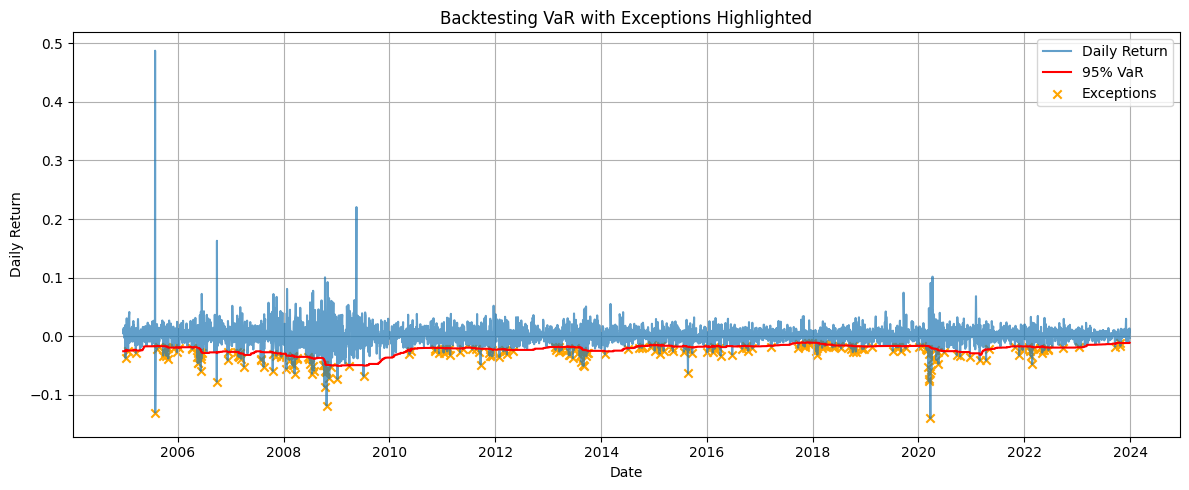

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you have portfolio_returns as a daily return series
# Calculate rolling 1-year Historical VaR at 95% confidence
VaR_95 = portfolio_returns.rolling(window=252).quantile(0.05)

# Drop initial NaNs
valid_data = pd.DataFrame({
    'Returns': portfolio_returns,
    'VaR_95': VaR_95
}).dropna()

# Backtesting: Count exceptions where actual return < VaR
exceptions = valid_data['Returns'] < valid_data['VaR_95']
num_exceptions = exceptions.sum()
total_days = len(valid_data)
exception_rate = num_exceptions / total_days * 100

print(f"Total Days Evaluated: {total_days}")
print(f"Number of Exceptions: {num_exceptions}")
print(f"Exception Rate: {exception_rate:.2f}%")

# Plot returns and VaR with exceptions marked
plt.figure(figsize=(12, 5))
plt.plot(valid_data.index, valid_data['Returns'], label='Daily Return', alpha=0.7)
plt.plot(valid_data.index, valid_data['VaR_95'], color='red', label='95% VaR')
plt.scatter(valid_data.index[exceptions], valid_data['Returns'][exceptions], 
            color='orange', label='Exceptions', marker='x')
plt.title('Backtesting VaR with Exceptions Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 99% VaR

In [12]:
# Define tickers and weights
tickers = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS']
weights = np.array([0.28, 0.25, 0.18, 0.16, 0.13])  # Market cap weights

In [13]:
# Calculate Historical VaR at 99% confidence level
VaR_99 = np.percentile(portfolio_returns, 1)

# Calculate Parametric VaR
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()
VaR_parametric = mean_return - 2.33 * std_return  # 99% confidence

# Calculate Conditional VaR (Expected Shortfall)
CVaR_99 = portfolio_returns[portfolio_returns <= VaR_99].mean()

# Output the results
print(f"Historical VaR (99%): {VaR_99:.4f}")
print(f"Parametric VaR (99%): {VaR_parametric:.4f}")
print(f"Conditional VaR (99%): {CVaR_99:.4f}")

Historical VaR (99%): -0.0433
Parametric VaR (99%): -0.0406
Conditional VaR (99%): -0.0618


Total Days Evaluated: 4698
Number of Exceptions: 62
Exception Rate: 1.32%


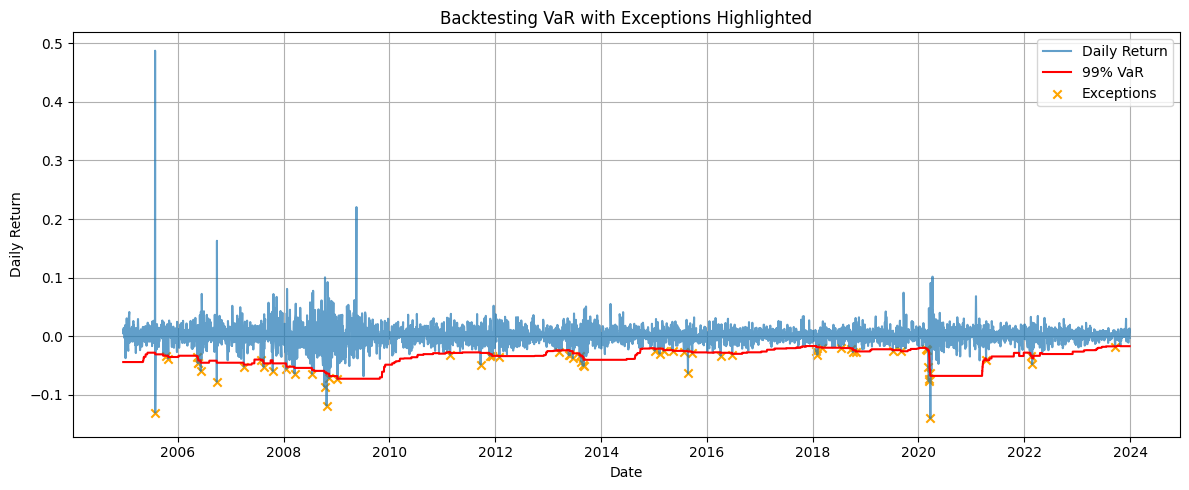

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you have portfolio_returns as a daily return series
# Calculate rolling 1-year Historical VaR at 99 %confidence
VaR_99 = portfolio_returns.rolling(window=252).quantile(0.01)

# Drop initial NaNs
valid_data = pd.DataFrame({
    'Returns': portfolio_returns,
    'VaR_99': VaR_99
}).dropna()

# Backtesting: Count exceptions where actual return < VaR
exceptions = valid_data['Returns'] < valid_data['VaR_99']
num_exceptions = exceptions.sum()
total_days = len(valid_data)
exception_rate = num_exceptions / total_days * 100

print(f"Total Days Evaluated: {total_days}")
print(f"Number of Exceptions: {num_exceptions}")
print(f"Exception Rate: {exception_rate:.2f}%")

# Plot returns and VaR with exceptions marked
plt.figure(figsize=(12, 5))
plt.plot(valid_data.index, valid_data['Returns'], label='Daily Return', alpha=0.7)
plt.plot(valid_data.index, valid_data['VaR_99'], color='red', label='99% VaR')
plt.scatter(valid_data.index[exceptions], valid_data['Returns'][exceptions], 
            color='orange', label='Exceptions', marker='x')
plt.title('Backtesting VaR with Exceptions Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Benchmarking

In [3]:
tickers = ['^BSESN']
start_date = '2004-01-01'
end_date = '2024-01-01'

# Step 2: Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Step 3: Save to Excel
data.to_excel("bse_2004_2024.xlsx")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
